### 선형회귀 이해하기
- 성적데이터를 기반으로 선형회귀를 이해해보자

In [1]:
# 성적 데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# 성적 데이터 생성
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
            index = ['준영', '종화', '경민', '승훈'],
            columns = ['시간', '성적'])
data

,시간,성적
준영,2,20
종화,4,40
경민,8,80
승훈,9,90


### MSE가 최소가 되는 최적의 w, b를 찾는 방법
- MSE : 평균제곱오차(Mean Squared Error) --> 비용함수(cost)
- 1. 수학 공식을 이용한 해석적 모델
- 2. 경사하강법(XGBoost 에서 오차를 계산하는 방법)

#### 수학 공식을 이용한 해석적 모델
- LinearRegression
- 공식을 이용해서 적은 계산으로 한 번에 최적의 선형 함수를 찾는 방법
- 공식이 완벽하지 않을 경우 잘 못 찾을 수도 있고,
- 공식이 잘못 되었을 경우 고칠 수 없다는 문제가 있음 ==> 추후 규제를 접목 개선

In [3]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 하이퍼 파라미터 설정
linear_model = LinearRegression()

# 학습
linear_model.fit(data[['시간']], data['성적']) # 문제는 2차원, 정답은 1차원

LinearRegression()

#### y = wx + b (1개의 문제)

In [4]:
# 기울기, 가중치 출력
print('기울기, 가중치 : ', linear_model.coef_)
# 절편, 편향 출력
print('절편, 편향 : ', linear_model.intercept_)

기울기, 가중치 :  [10.]
절편, 편향 :  7.105427357601002e-15


In [5]:
# 영재씨가 7시간 공부했을 때 몇 점? - 예측
linear_model.predict([[7]])

C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

### H(x)
- 가설함수

In [6]:
# 함수 정의
def h(w, x) : 
    return w * x + 0

### 비용함수(CostFunction)
- 비용 = 오차

In [7]:
# 비용함수 정의
# data : 문제 값
# target : 정답(실제 값)
# weight : 가중치

def cost(data, target, weight) :
    # 예측
    y_pre = h(weight, data)
    # 평균제곱오차 = ((예측값 - 실제값)**2).mean()
    error = ((y_pre - target) ** 2).mean()
    return error

In [8]:
# 가중치에 따른 오차값 확인
cost(data['시간'], data['성적'], 8)

165.0

In [9]:
cost(data['시간'], data['성적'], 7)

371.25

In [10]:
cost(data['시간'], data['성적'], 10)

0.0

In [12]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 확인
cost_list = []

for w in range(5, 16) : # 5 ~ 15 까지 가중치 변화
    err = cost(data['시간'], data['성적'], w)
    cost_list.append([err])
cost_list

[[1031.25],
 [660.0],
 [371.25],
 [165.0],
 [41.25],
 [0.0],
 [41.25],
 [165.0],
 [371.25],
 [660.0],
 [1031.25]]

<function matplotlib.pyplot.show(close=None, block=None)>

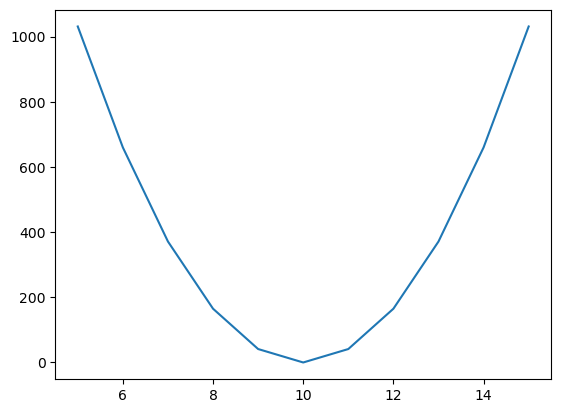

In [13]:
# 비용함수(MSE) 그래프 그리기
plt.plot(range(5, 16), cost_list)
plt.show

In [14]:
linear_model.score(data[['시간']], data['성적'])
# 분류모델 : score - 정확도
# 회귀모델 : score(MSE를 기반으로 한 R2score) - 유사도

1.0

#### 경사하강법
- SGDRegressor
- 점진적으로 오차가 작은 선형 함수를 찾아가는 방법
- 오차를 수정하는 방향으로 그래프를 다시 그려줌
- 선형함수를 잘못 찾았을 경우 수정이 가능
- 점진적으로 찾아가므로 계산량이 많아서 시간이 오래 걸림
- 학습율(learning rate)
    - 너무 크게 설정하면 오차가 커짐(발산)
    - 너무 작게 설정하면 국소지역점에 빠져서 최적의 해를 찾지 못함

In [15]:
from sklearn.linear_model import SGDRegressor

# 모델 생성 및 하이퍼 파라미터 설정
sgd_model = SGDRegressor(max_iter=5000,    # 가중치 업데이트 반복 횟수
                         eta0 = 0.001,     # 학습률(learning rate)
                         verbose = 1)

# 학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.22, NNZs: 1, Bias: 0.174728, T: 4, Avg. loss: 1895.163278
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.07, NNZs: 1, Bias: 0.295497, T: 8, Avg. loss: 1483.501239
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.77, NNZs: 1, Bias: 0.392796, T: 12, Avg. loss: 1211.706916
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.35, NNZs: 1, Bias: 0.474750, T: 16, Avg. loss: 1008.725576
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.86, NNZs: 1, Bias: 0.545595, T: 20, Avg. loss: 850.887889
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.30, NNZs: 1, Bias: 0.607879, T: 24, Avg. loss: 724.237260
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.70, NNZs: 1, Bias: 0.663189, T: 28, Avg. loss: 621.042979
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.06, NNZs: 1, Bias: 0.712816, T: 32, Avg. loss: 535.575046
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.38, NNZs: 1, Bias: 0.757547, T: 36, Avg. loss: 464.211229
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [16]:
# 예측
sgd_model.predict([[7]])

C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88650716])

In [18]:
# 가중치(w), 편향(b) 확인하기
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.79193163]
[1.34298578]


In [19]:
sgd_model.score(data[['시간']], data['성적'])
# 1에 가까울수록 모델이 예측한 성능이 높다고 판단

0.9995408289251838